# Progetto PAA
#### Autore:  Federico Schipani - 6185896 - <a href="mailto:federico.schipani@stud.unifi.it">federico.schipani@stud.unifi.it</a>

##### Descrizione del progetto:
In questo notebook verranno effettuate verifiche numeriche su somme infinite dei reciproci dei numeri di Tribonacci. L'articolo da cui è stato preso spunto per questo progetto è <a href = "https://cs.uwaterloo.ca/journals/JIS/VOL19/Kuhapatanakul/kuha7.pdf">Reciprocal Sums of the Tribonacci Numbers</a>.

### Preparazione:
Per prima cosa è necessario importare tutti i pacchetti necessari allo svolgimento di questo progetto:

In [1]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
from functools import lru_cache
import sys
sys.setrecursionlimit(10000000)

Per poter stampare i risultati in stile LaTeX è necessario eseguire questa istruzione:

In [2]:
init_printing()

### Introduzione:

I numeri di Fibonacci sono definiti dalla seguente relazione di ricorrenza:

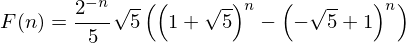

In [3]:
F = Function('F')
n = symbols('n',integer=True)
f = F(n+1)-F(n)-F(n-1)
closedFib = simplify(rsolve(f, F(n), {F(0):0, F(1):1}))
closedFibEq = Eq(F(n), closedFib)
closedFibEq

In [4]:
closedFib1 = Lambda([n], closedFib)
[(n, simplify(fibonacci(n)-closedFib1(n).doit())) for n in range(0,11)]

Definiamo una funzione per il calcolo dei numeri di Tribonacci nel seguente modo:

In [5]:
initial_positive_conditions = {0:0, 1:1, 2:1}


def makePositiveTribonacci(maxsize = None):
    @lru_cache(maxsize)
    def calcPositiveTribonacci(n):
        return calcPositiveTribonacci(n-1)  + calcPositiveTribonacci(n-2) + calcPositiveTribonacci(n-3) if n not in initial_positive_conditions else initial_positive_conditions[n]
    return calcPositiveTribonacci

positiveTribonacci = makePositiveTribonacci(None)
PT = implemented_function(Function('T'), positiveTribonacci)


Per verificare che la funzione calcola effettivamente i numeri di Tribonacci si esegue una verifica numerica:

In [6]:
lambda_tribonacci = lambdify(n, PT(n))
[(n, lambda_tribonacci(n)) for n in range (0,11)]

Lo scopo di questo notebook è verificare queste tre uguaglianze:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{F_k } \right)^{-1}\right\rfloor = F_{n-2}\ se\ n\ è\ pari\ e\ n \geq 2,\ F_{n-2}-1\ se\ n\ è\ dispari\ e\ n \geq 1 $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{(-1)^k}{F_k}\right)^{-1}\right\rfloor = (-1)^n F_{n+1}-1\ con\ (n>1) $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{1}{\sum_{i = 1}^{k} F_i}\right)^{-1}\right\rfloor = F_n -1\ con \ (n \geq 3) $$

### Svolgimento:

La sequenza di numeri di Tribonacci può essere estesa per valori negativi di n, usando la definizione e le condizioni iniziali.
$$F_n = F_{n-1}+F_{n-2}+F_{n-3}$$
Effettuando uno shift di tre posizioni, e cambiando il segno si ottiene:
$$F_{n} = F_{n-3}-F_{n+2}-F_{n+1}$$


In [7]:
initial_negative_conditions = {0:0, -1:0, -2:1}
def makeNegativeTribonacci(maxsize=None):
    @lru_cache(maxsize=maxsize)
    def calcNegativeTribonacci(n):
        return calcNegativeTribonacci(n+3)  - calcNegativeTribonacci(n+2) - calcNegativeTribonacci(n+1) if n not in initial_negative_conditions else initial_negative_conditions[n]
    return calcNegativeTribonacci
negativeTribonacci = makeNegativeTribonacci(maxsize = None)
NT = implemented_function(Function('NT'), negativeTribonacci)
lambda_negative_tribonacci = lambdify(n, NT(n))
[(n*-1, lambda_negative_tribonacci(n*-1)) for n in range (0,11)]

Per comodità definiamo una funzione di Tribonacci unica, sia per i numeri negativi che positivi:

In [8]:
def tribonacci(n):
    if n>=0:
        return positiveTribonacci(n)
    elif n<0:
        return negativeTribonacci(n)
T = implemented_function(Function('T'), tribonacci)
lambda_tribonacci = lambdify(n, T(n))
[(n, lambda_tribonacci(n)) for n in range(-40, 40)]
#SWAG EFFICIENZA

Prima di dimostrare la veridicità delle tre uguaglianze descritte nell'introduzione vengono forniti 3 lemmi.
###### Lemma 1: 
Sia $n$ un intero positivo, allora:
1. $T^{2}_{n} - T_{n-1} T_{n+1} = T_{-(n+1)}$
2. $\sum_{i=1}^{n} T_i = (T_{n+2}+T_{n}-1)/2$ 
3. $T_{n} > T_{-(n+3)}$ 


Effettuiamo una verifica numerica della prima uguaglianza:

In [9]:
lem1_expr1 = T(n)**2 - T(n-1)*T(n+1)
lem1_expr2 = T(-(n+1))
calc_lem1_expr1 = Lambda([n], lem1_expr1)
calc_lem1_expr2 = Lambda([n], lem1_expr2)
[(calc_lem1_expr1(n).evalf()-calc_lem1_expr2(n).evalf()) for n in range(0,40)]

Effettuiamo una verifica numerica della seconda uguaglianza:

In [10]:
lem1_expr4 = (T(n+2)+T(n)-1)/2
i = symbols('i', integer=True)
lem1_expr3 = Sum(T(i), (i, 1, n))
calc_lem1_expr4 = Lambda([n], lem1_expr4)
calc_lem1_expr3 = Lambda([n], lem1_expr3)
[(calc_lem1_expr4(n).evalf()-calc_lem1_expr3(n).doit().evalf()) for n in range(0,40)]

Effettuiamo una verifica numerica del terzo risultato:

In [11]:
[(n, T(n).evalf()>T(-(n+3)).evalf()) for n in range(0, 100)]

###### Lemma 2: 
Sia $n > 1$ un intero positivo, allora:
1. $\frac{1}{T_n - T_{n-1} + 1} < \sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1} $
2. $\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$

Per verificare numericamente le due uguaglianze bisogna in qualche modo cercare di dare un valore alla sommatoria per $k=n$ che arriva fino a $\infty$.
Per prima cosa si verifica:
$$\frac{1}{T_n - T_{n-1}+1} < \sum_{k=n}^{\infty} \frac{1}{T_k} $$
In questo caso per verificare questa uguaglianza è sufficiente fissare un limite superiore abbastanza grande:

In [12]:
lem2_expr1 = 1/(T(n)-T(n-1)+1)
k = symbols('k', integer=True)
lem2_expr2 = Sum(1/T(k), (k, n, 200))
calc_lem2_expr2 = Lambda([n], lem2_expr2)
calc_lem2_expr1 = Lambda([n], lem2_expr1)
[(n, calc_lem2_expr1(n).evalf() < calc_lem2_expr2(n).doit().evalf()) for n in range(2, 40)]

Infine per verificare il primo  risultato basta verificare la seconda parte della disuguaglianza:
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}$$

In [13]:
lem2_expr3 = 1/(T(n)-T(n-1)-1)
calc_lem2_expr3 = Lambda([n], lem2_expr3)
[(n, calc_lem2_expr2(n).doit().evalf() < calc_lem2_expr3(n).evalf()) for n in range(2,40)]

Nella verifica del secondo risultato si segue lo stesso approccio:
$$\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k}$$
E poi 
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$$

In [14]:
lem2_expr4 = 1/(((-1)**n) * (T(n)+T(n-1))+1)
lem2_expr5 =  Sum(((-1)**k)/T(k), (k, n, 200))
calc_lem2_expr5 = Lambda([n], lem2_expr5)
calc_lem2_expr4 = Lambda([n], lem2_expr4)
[(n, calc_lem2_expr4(n).evalf() < calc_lem2_expr5(n).doit().evalf()) for n in range(2, 40)]
#SWAG CALCOLI

In [15]:
lem2_expr6 = 1/(((-1)**n) * (T(n)+T(n-1))-1)
calc_lem2_expr6 = Lambda([n], lem2_expr6)
[(n, calc_lem2_expr6(n).evalf() > calc_lem2_expr5(n).doit().evalf()) for n in range(2, 40)]

###### Lemma 3: 
Sia $n>2$ un intero positivo, allora:
1. Se $T_{-(n+1)} < 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$
2. Se $T_{-(n+1)} > 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$

Dimostrazione:

Dal primo lemma si possono trarre le seguenti conclusioni

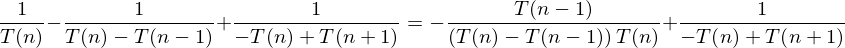

In [16]:
lem3_expr1 = (1/(T(n)))-(1/(T(n)-T(n-1)))+(1/((T(n+1)-T(n))))
lem3_expr2 = ((-T(n-1))/(T(n)*(T(n)-T(n-1)))) +  (1/(T(n+1)-T(n)))
lem3_eq12 = Eq(lem3_expr1, lem3_expr2)
lem3_eq12

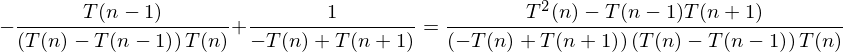

In [17]:
lem3_expr3 = ((T(n)**2 - T(n+1)*T(n-1))/(T(n)*(T(n)-(T(n-1)))*(T(n+1)-T(n))))
lem3_eq23 = Eq(lem3_expr2, lem3_expr3)
lem3_eq23

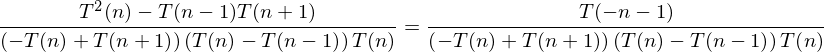

In [18]:
lem3_expr4 = (T(-(n+1)))/(T(n)*(T(n)-T(n-1))*(T(n+1)-T(n)))
lem3_eq34 = Eq(lem3_expr3, lem3_expr4)
lem3_eq34

A questo punto si può effettuare una verifica sulle uguaglianze scritte:

In [19]:
#NON TORNA
calc_lem3_expr4 = Lambda([n], lem3_expr4)
calc_lem3_expr1 = Lambda([n], lem3_expr1)
[simplify((calc_lem3_expr4(n).evalf()-calc_lem3_expr1(n).evalf())) for n in range(3,30)]

Se $T_{-(n+1)} < 0$ abbiamo che $$\frac{1}{T_n - T_{n-1}} > \frac{1}{T_n} + \frac{1}{T_{n+1} - T_n}$$

Si effettua una verifica numerica di questa diseguaglianza:

In [20]:
lem3_expr5 = 1/(T(n)-T(n-1))
lem3_expr6 = 1/T(n) + 1/(T(n+1) - T(n))

calc_lem3_expr6 = Lambda([n], simplify(lem3_expr6))
calc_lem3_expr5 = Lambda([n], simplify(lem3_expr5))

[(n, calc_lem3_expr5(n).evalf()-calc_lem3_expr6(n).evalf()) for n in range(3, 40) if lambda_tribonacci(-(n+1))<0 ]

Ripetendo la diseguaglianza si ottiene:
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$$

Effettuiamo una verifica numerica, per ovvi motivi non si può effettuare una sommatoria di numeri infiniti, quindi ci limiteremo a fissare un $k$ abbastanza grande.